In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.16.5
Pandas: 0.25.1
Matplotlib: 3.1.1
Seaborn: 0.9.0
Scipy: 1.3.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(data.shape)

(284807, 31)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [8]:
# For counting how many fradulent and non fradulent transactions are in the dataset.
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
counts = data.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


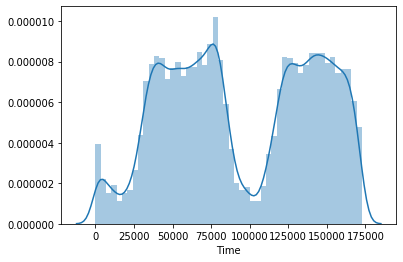

In [10]:
# Conclusion- not dependent on time
sns.distplot(data.Time)

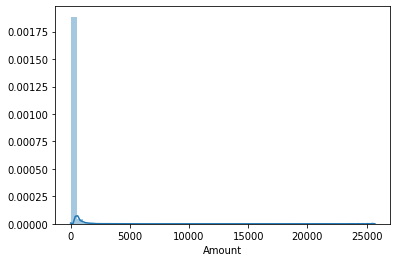

In [11]:
sns.distplot(data.Amount)

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

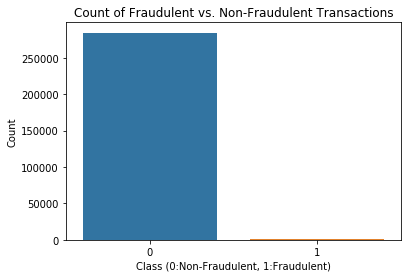

In [12]:
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [13]:
# Splitting the dataset into 70% train and 30% test.
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3)
train.shape, test.shape

((199364, 31), (85443, 31))

In [14]:
train_X=train[["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"]]
train_y=train.Class
test_X=test[["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"]]
test_y=test.Class

In [15]:
# Building Models
# Comparing Models
import sklearn

In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0).fit(train_X,train_y)
y_test_probs=tree.predict_proba(test_X)[:,1]
y_train_probs=tree.predict_proba(train_X)[:,1]

In [17]:
from sklearn.metrics import precision_recall_curve,auc
precision_test,recall_test,thresholds_test=precision_recall_curve(test_y,y_test_probs)
area_test=auc(recall_test,precision_test)

precision_tr,recall_tr,thresholds_tr=precision_recall_curve(train_y,y_train_probs)
area_tr=auc(recall_tr,precision_tr)

print("Area under precision recall curve for tree modal for train set : ",area_tr)
print("Area under precision recall curve for tree modal for test set : ",area_test)

Area under precision recall curve for tree modal for train set :  1.0
Area under precision recall curve for tree modal for test set :  0.7555875247319456


In [18]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=0).fit(train_X,train_y)
y_test_probs=forest.predict_proba(test_X)[:,1]
y_train_probs=forest.predict_proba(train_X)[:,1]

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
from sklearn.metrics import precision_recall_curve,auc
precision_test,recall_test,thresholds_test=precision_recall_curve(test_y,y_test_probs)
area_test=auc(recall_test,precision_test)

precision_tr,recall_tr,thresholds_tr=precision_recall_curve(train_y,y_train_probs)
area_tr=auc(recall_tr,precision_tr)

print("Area under precision recall curve for RF modal for train set : ",area_tr)
print("Area under precision recall curve for RF modal for test set : ",area_test)

Area under precision recall curve for RF modal for train set :  0.9993979184594997
Area under precision recall curve for RF modal for test set :  0.8110459880565977


In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0).fit(train_X,train_y)

# Predicting test set
pred_y = classifier.predict(test_X)
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_y))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85284
           1       0.68      0.51      0.58       159

    accuracy                           1.00     85443
   macro avg       0.84      0.75      0.79     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [22]:
classifier = Sequential()
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(train_X, train_y, batch_size = 20, epochs = 100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
199364/199364 [==============================] - 40s 200us/step - loss: 0.0270 - acc: 0.9983
Epoch 2/100
199364/199364 [==============================] - 35s 175us/step - loss: 0.0269 - acc: 0.9983
Epoch 3/100
199364/199364 [==============================] - 39s 194us/step - loss: 0.0269 - acc: 0.9983
Epoch 4/100
199364/199364 [==============================] - 39s 194us/step - loss: 0.0269 - acc: 0.9983
Epoch 5/100
199364/199364 [==============================] - 37s 184us/step - loss: 0.0269 - acc: 0.9983
Epoch 6/100
199364/199364 [==============================] - 31s 157us/step - loss: 0.0269 - acc: 0.9983
Epoch 7/100
199364/199364 [==============================] - 36s 180us/step - loss: 0.0269 - acc: 0.9983
Epoch 8/100
199364/199364 [==============================] - 34s 169us/step - loss: 0.0269 - acc: 0.9983
Epoch 9/100
199364/199364 [==============================] -

In [24]:
score = classifier.evaluate(test_X, test_y)
score

85443/85443 [==============================] - 4s 41us/step


[0.029994095532518007, 0.998139110284049]